# Importação dos dados

In [1]:
import pandas as pd
import glob
import numpy as np

In [2]:
# Importo e monto o google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filenames = glob.glob("/content/drive/MyDrive/Projeto/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename, encoding = "latin_1", delimiter=';'))

# Concatenate all data into one DataFrame
df = pd.concat(dfs, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,10.0,11/06/2007,Segunda,15:30:00,MG,381,623.2,OLIVEIRA,Falta de atenção,Colisão frontal,...,0,5,0,4,6,NaN,NaN,NaN,NaN,NaN
1,10.0,11/06/2007,Segunda,15:30:00,MG,381,623.2,OLIVEIRA,Falta de atenção,Colisão frontal,...,0,5,0,4,6,NaN,NaN,NaN,NaN,NaN
2,1032898.0,13/08/2007,Segunda,14:25:00,MG,40,585.5,ITABIRITO,Outras,Saída de Pista,...,1,2,0,1,1,NaN,NaN,NaN,NaN,NaN
3,1051130.0,12/02/2007,Segunda,02:10:00,MA,135,11.0,SAO LUIS,Animais na Pista,Atropelamento de animal,...,1,0,0,3,1,NaN,NaN,NaN,NaN,NaN
4,1066824.0,20/11/2007,Terça,05:30:00,CE,222,30.8,CAUCAIA,Defeito mecânico em veículo,Capotamento,...,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936424,475179.0,2022-07-20,quarta-feira,06:00:00,BA,330.0,808,UBATA,Falta de elemento de contenção que evite a saí...,Saída de leito carroçável,...,1,0,0,1,1,"-14,22997134",-39.484656,SPRF-BA,DEL03-BA,UOP01-DEL03-BA
1936425,475214.0,2022-08-05,sexta-feira,09:14:00,RN,101.0,96,NATAL,Condutor deixou de manter distância do veículo...,Colisão traseira,...,1,1,0,1,2,"-5,84949622",-35.208908,NaN,NaN,NaN
1936426,475219.0,2022-08-29,segunda-feira,08:15:00,RJ,101.0,417,MANGARATIBA,Reação tardia ou ineficiente do condutor,Colisão com objeto,...,0,1,0,2,1,"-22,91293797",-43.897324,SPRF-RJ,DEL03-RJ,UOP01-DEL03-RJ
1936427,475253.0,2022-07-09,sábado,01:43:00,RS,448.0,14,CANOAS,Reação tardia ou ineficiente do condutor,Colisão traseira,...,3,0,3,5,2,"-29,924847",-51.225426,SPRF-RS,DEL01-RS,UOP01-DEL01-RS


# Análise da prévia dos dados de 2022

In [ ]:
df2 = df.copy()
def padronizar_data_inversa(data):
  if '-' in data:
    return data
  data_separada = data.split('/')
  return '{0}-{1}-{2}'.format('20{0}'.format(data_separada[2]) if len(data_separada[2]) is 2 else data_separada[2], data_separada[1], data_separada[0])

# Padroniza a data inversa
df2.loc[:, 'data_inversa'] = df2.apply(lambda x: padronizar_data_inversa(x['data_inversa']), axis=1)
df2.loc[:, 'ano'] = df2.apply(lambda x: x['data_inversa'].split('-')[0], axis=1)
df2 = df2[df2['ano'] == '2022']
df2.count()

id                        42070
data_inversa              42070
dia_semana                42070
horario                   42070
uf                        42070
br                        41932
km                        41932
municipio                 42070
causa_acidente            42070
tipo_acidente             42070
classificacao_acidente    42070
fase_dia                  42070
sentido_via               42070
condicao_metereologica    42070
tipo_pista                42070
tracado_via               42070
uso_solo                  42070
ano                       42070
pessoas                   42070
mortos                    42070
feridos_leves             42070
feridos_graves            42070
ilesos                    42070
ignorados                 42070
feridos                   42070
veiculos                  42070
latitude                  42070
longitude                 42070
regional                  42065
delegacia                 42053
uop                       42006
dtype: i

In [ ]:
df2['classificacao_acidente'].value_counts()

Com Vítimas Feridas    31445
Sem Vítimas             7604
Com Vítimas Fatais      3021
Name: classificacao_acidente, dtype: int64

In [ ]:
df2[df2['classificacao_acidente'] == 'Com Vítimas Fatais']['classificacao_acidente'].count()/df2['classificacao_acidente'].count()

0.07180888994532922

# Análise dos dados

In [ ]:
# Pega apenas os dados do RJ e da BR 101
df = df[df['uf'].isin(['RJ']) & df['br'].isin(['101', 101])]
#df = df[df['uf'].isin(['RJ'])]

In [ ]:
df

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
12,173715.0,01/01/2007,Segunda,00:50:00,RJ,101,321.5,NITEROI,Não guardar distância de segurança,Colisão traseira,...,0,2,0,0,2,NaN,NaN,NaN,NaN,NaN
72,173863.0,01/01/2007,Segunda,12:10:00,RJ,101,304.0,SAO GONCALO,Outras,Atropelamento de pessoa,...,0,1,0,0,1,NaN,NaN,NaN,NaN,NaN
340,174320.0,01/01/2007,Segunda,10:00:00,RJ,101,270.0,RIO BONITO,Velocidade incompatível,Colisão com objeto fixo,...,0,1,0,2,1,NaN,NaN,NaN,NaN,NaN
402,174409.0,02/01/2007,Terça,10:00:00,RJ,101,80.0,CAMPOS DOS GOYTACAZES,Outras,Colisão traseira,...,0,2,0,0,2,NaN,NaN,NaN,NaN,NaN
419,174435.0,02/01/2007,Terça,07:45:00,RJ,101,314.0,SAO GONCALO,Outras,Colisão lateral,...,0,2,0,0,2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936201,471333.0,2022-08-30,terça-feira,08:00:00,RJ,101.0,413,ITAGUAI,Pista Escorregadia,Saída de leito carroçável,...,1,0,0,2,1,"-22,89931896",-43.865293,SPRF-RJ,DEL01-RJ,UOP04-DEL01-RJ
1936210,471352.0,2022-08-31,quarta-feira,04:10:00,RJ,101.0,396,RIO DE JANEIRO,Transitar na contramão,Colisão com objeto,...,0,1,0,1,1,"-22,87854523",-43.731007,SPRF-RJ,DEL01-RJ,UOP04-DEL01-RJ
1936306,471505.0,2022-08-31,quarta-feira,04:30:00,RJ,101.0,531,ANGRA DOS REIS,Velocidade Incompatível,Colisão com objeto,...,0,1,0,0,1,"-23,02147898",-44.523445,SPRF-RJ,DEL03-RJ,UOP02-DEL03-RJ
1936322,471526.0,2022-08-31,quarta-feira,18:30:00,RJ,101.0,240,SILVA JARDIM,Ausência de reação do condutor,Colisão traseira,...,0,1,0,1,2,"-22,63006139",-42.436383,SPRF-RJ,DEL02-RJ,UOP03-DEL02-RJ


In [ ]:
# 6h-11h59: manhã -      0  [0 0]
# 12h-17h59: tarde -     1  [0 1]
# 18h-23h59: noite -     2  [1 0]
# 00h-5h59: madrugada -  3  [1 1]
# split treino: 70% - teste: 30%
# Dados para pegar:
# data_inversa (dividir por mês, quinzenal), dia_semana, horario,
# causa_acidente, tipo_acidente, sentido_via (?), condicao_metereologica, 
# tipo_pista, tracado_via, uso_solo, pessoas, mortos, feridos_leves, feridos_graves
# ilesos, ignorados, feridos, veiculos

# Em uma nova análise plotar um gráfico por mês e analisar a duplicação da faixa
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56324 entries, 12 to 1894347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      56324 non-null  float64
 1   data_inversa            56324 non-null  object 
 2   dia_semana              56324 non-null  object 
 3   horario                 56324 non-null  object 
 4   uf                      56324 non-null  object 
 5   br                      56324 non-null  object 
 6   km                      56324 non-null  object 
 7   municipio               56324 non-null  object 
 8   causa_acidente          56324 non-null  object 
 9   tipo_acidente           56324 non-null  object 
 10  classificacao_acidente  56323 non-null  object 
 11  fase_dia                56324 non-null  object 
 12  sentido_via             56324 non-null  object 
 13  condicao_metereologica  56323 non-null  object 
 14  tipo_pista              56324 non-n

In [ ]:
# Mostra os dados do df
df

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
12,173715.0,01/01/2007,Segunda,00:50:00,RJ,101,321.5,NITEROI,Não guardar distância de segurança,Colisão traseira,...,0,2,0,0,2,NaN,NaN,NaN,NaN,NaN
72,173863.0,01/01/2007,Segunda,12:10:00,RJ,101,304.0,SAO GONCALO,Outras,Atropelamento de pessoa,...,0,1,0,0,1,NaN,NaN,NaN,NaN,NaN
340,174320.0,01/01/2007,Segunda,10:00:00,RJ,101,270.0,RIO BONITO,Velocidade incompatível,Colisão com objeto fixo,...,0,1,0,2,1,NaN,NaN,NaN,NaN,NaN
402,174409.0,02/01/2007,Terça,10:00:00,RJ,101,80.0,CAMPOS DOS GOYTACAZES,Outras,Colisão traseira,...,0,2,0,0,2,NaN,NaN,NaN,NaN,NaN
419,174435.0,02/01/2007,Terça,07:45:00,RJ,101,314.0,SAO GONCALO,Outras,Colisão lateral,...,0,2,0,0,2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894140,380595.0,2021-08-15,domingo,19:30:00,RJ,101.0,64,CAMPOS DOS GOYTACAZES,Transitar na contramão,Colisão transversal,...,1,1,0,1,2,"-21,75361159","-41,34237885",SR-RJ,UOP02,DEL08
1894224,382049.0,2021-08-30,segunda-feira,13:45:00,RJ,101.0,301,SAO GONCALO,Frear bruscamente,Colisão transversal,...,0,2,0,0,1,"-22,77857497","-42,95745101",SR-RJ,UOP02,DEL02
1894268,382797.0,2021-07-20,terça-feira,20:20:00,RJ,101.0,413,ITAGUAI,Transitar na contramão,Colisão frontal,...,2,0,1,2,3,"-22,8995907","-43,86574745",SR-RJ,UOP04,DEL01
1894279,382939.0,2021-06-30,quarta-feira,11:00:00,RJ,101.0,297,ITABORAI,Curva acentuada,Colisão lateral mesmo sentido,...,0,1,1,1,2,"-22,77063725","-42,92186201",SR-RJ,UOP02,DEL02


In [ ]:
len(df['br'].unique())

2

In [ ]:
df['br'].unique()

array([101, '101'], dtype=object)

In [ ]:
df['br'].value_counts()

101    48818
101     7506
Name: br, dtype: int64

In [ ]:
# Verificar que dado tempos nos campos categóricos
campos_utilizados = ['dia_semana', 'causa_acidente', 'tipo_acidente', 'condicao_metereologica',
     'tipo_pista', 'tracado_via', 'uso_solo', 'sentido_via', 'classificacao_acidente']
# Mostrar os valores possíveis
for campo in campos_utilizados:
  print(campo, df[campo].unique())

dia_semana ['Segunda' 'Terça' 'Quarta' 'Quinta' 'Domingo' 'Sexta' 'Sábado' 'domingo'
 'segunda-feira' 'terça-feira' 'quarta-feira' 'quinta-feira' 'sexta-feira'
 'sábado']
causa_acidente ['Não guardar distância de segurança' 'Outras' 'Velocidade incompatível'
 'Desobediência à sinalização' 'Falta de atenção'
 'Defeito mecânico em veículo' 'Animais na Pista' 'Defeito na via'
 'Dormindo' 'Ultrapassagem indevida' 'Ingestão de álcool'
 'Condutor Dormindo' 'Falta de Atenção à Condução'
 'Carga excessiva e/ou mal acondicionada' 'Restrição de Visibilidade'
 'Falta de Atenção do Pedestre' 'Defeito Mecânico no Veículo'
 'Velocidade Incompatível' 'Avarias e/ou desgaste excessivo no pneu'
 'Ingestão de Álcool' 'Ultrapassagem Indevida'
 'Desobediência às normas de trânsito pelo condutor' 'Pista Escorregadia'
 'Fenômenos da Natureza' 'Mal Súbito'
 'Objeto estático sobre o leito carroçável'
 'Sinalização da via insuficiente ou inadequada'
 'Deficiência ou não Acionamento do Sistema de Iluminação/Sina

Dado a grande quantidade de causa de acidentes e a dificuldade do agente ao saber dessa informação na hora, ela será desconsidera.

A classificação de acidentes do tipo NAN, será considerado Ignorado. Visto que Ignora e uma classificação de acidentes do tipo nula, conjecturamente significam a mesma coisa.

Os dados de dia semana precisam ser padronizados

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
x = df['tipo_acidente'].value_counts()
result = []
for key in dict(x):
  result.append(str.format("{0} & {1} \\\\ \\hline", key, x[key]))
print('\n'.join(result))

Colisão traseira & 19669 \\ \hline
Colisão lateral & 9681 \\ \hline
Saída de Pista & 4568 \\ \hline
Colisão Transversal & 3791 \\ \hline
Colisão com objeto fixo & 2954 \\ \hline
Colisão frontal & 2574 \\ \hline
Capotamento & 2344 \\ \hline
Atropelamento de pessoa & 1690 \\ \hline
Queda de motocicleta / bicicleta / veículo & 1340 \\ \hline
Tombamento & 1216 \\ \hline
Colisão com objeto estático & 816 \\ \hline
Colisão transversal & 778 \\ \hline
Saída de leito carroçável & 728 \\ \hline
Atropelamento de animal & 636 \\ \hline
Colisão com objeto móvel & 628 \\ \hline
Colisão com bicicleta & 540 \\ \hline
Atropelamento de Pedestre & 474 \\ \hline
Queda de ocupante de veículo & 447 \\ \hline
Danos Eventuais & 334 \\ \hline
Incêndio & 327 \\ \hline
Derramamento de Carga & 181 \\ \hline
Engavetamento & 145 \\ \hline
Colisão com objeto & 124 \\ \hline
Atropelamento de Animal & 118 \\ \hline
Colisão lateral mesmo sentido & 99 \\ \hline
Colisão com objeto em movimento & 55 \\ \hline
Colisão lat

In [ ]:
df['condicao_metereologica'].value_counts()

Ceu Claro           25139
Nublado             11006
Chuva                9123
Sol                  5146
Céu Claro            4337
Ignorada              835
Garoa/Chuvisco        239
Nevoeiro/neblina      230
Ignorado              115
Vento                 111
Nevoeiro/Neblina       35
Granizo                 6
Neve                    1
Name: condicao_metereologica, dtype: int64

Aqui alguns agrupamentos pode ser feitas:

* Céu Claro = ['Ceu Claro', 'Sol']
* Ignorado = ['Ignorada']
* Nevoeiro/Neblina = ['Nevoeiro/neblina']
* Chuva = ['Vento', 'Garoa/Chuvisco']

Exluir granizo e neve ~ Não possui dados suficientes para o modelo

In [ ]:
df['tipo_acidente'].value_counts()

Colisão traseira                              19669
Colisão lateral                                9681
Saída de Pista                                 4568
Colisão Transversal                            3791
Colisão com objeto fixo                        2954
Colisão frontal                                2574
Capotamento                                    2344
Atropelamento de pessoa                        1690
Queda de motocicleta / bicicleta / veículo     1340
Tombamento                                     1216
Colisão com objeto estático                     816
Colisão transversal                             778
Saída de leito carroçável                       728
Atropelamento de animal                         636
Colisão com objeto móvel                        628
Colisão com bicicleta                           540
Atropelamento de Pedestre                       474
Queda de ocupante de veículo                    447
Danos Eventuais                                 334
Incêndio    

Aqui alguns agrupamentos pode ser feitas:

* Colisão transversal  = ['Colisão Transversal']
* Colisão com objeto fixo = ['Colisão com objeto estático']
* Atropelamento de pessoa = ['Atropelamento de Pedestre']
* Queda de motocicleta / bicicleta / veículo = ['Queda de ocupante de veículo']
* Danos Eventuais = ['Eventos atípicos']
* Colisão com objeto móvel = ['Colisão com objeto em movimento']
* Colisão traseira = ['Colisão lateral mesmo sentido']
* Colisão frontal = ['Colisão lateral sentido oposto']
* Derramamento de Carga = ['Derramamento de Carga']
* Saída de Pista = ['Saída de leito carroçável']

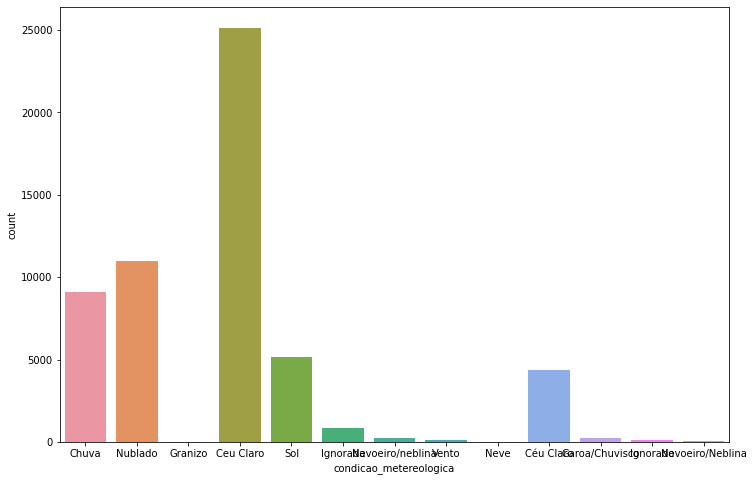

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='condicao_metereologica')

Quantidade de dados de uso_solo diferentes do dicionário: 7696
Quantidade SIM:  3665
Quantidade Não:  4031


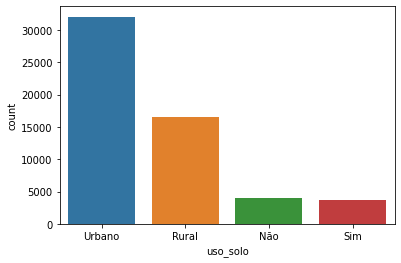

In [ ]:
# Analisa os dados de uso_solo
print('Quantidade de dados de uso_solo diferentes do dicionário:', len(df[df.uso_solo.isin(['Sim', 'Não'])]))
print('Quantidade SIM: ', len(df[df.uso_solo.isin(['Sim'])]))
print('Quantidade Não: ', len(df[df.uso_solo.isin(['Não'])]))
sns.countplot(data=df, x='uso_solo')

Como visto no dicionário de dados de 2017 em diante os dados de Sim serão considerados Urbano e os de Não serão considerados rural

In [ ]:
df['classificacao_acidente'].value_counts()

Sem Vítimas            34079
Com Vítimas Feridas    19731
Com Vítimas Fatais      2299
Ignorado                 214
Name: classificacao_acidente, dtype: int64

Acidentes com a classificacao ignora serão descartados

# Pré-processamento

In [ ]:
from sklearn import preprocessing

In [ ]:
def convert_to_latex(campo, transformacao):
  new_trans = {}
  for key, value in transformacao.items():
    if value not in new_trans:
      new_trans[value] = [value]
    new_trans[value].append(key)
  result = ""
  for key, values in new_trans.items():
    result += "{0} & {1} & {2} \\\\ \\hline\n".format(str(campo).replace('_', '\_'), key.replace('_', '\_'), ', '.join(values))
  print(result)

In [ ]:
transformacao = {'Ceu Claro': 'Céu Claro', 'Sol': 'Céu Claro', 'Ignorada': 'Ignorado', 'Nevoeiro/neblina': 'Nevoeiro/Neblina', 'Vento': 'Chuva', 'Garoa/Chuvisco': 'Chuva', 'Nulo': 'Ignorado'}


convert_to_latex('condicao_metereologica', transformacao)

condicao\_metereologica & Céu Claro & Céu Claro, Ceu Claro, Sol \\ \hline
condicao\_metereologica & Ignorado & Ignorado, Ignorada, Nulo \\ \hline
condicao\_metereologica & Nevoeiro/Neblina & Nevoeiro/Neblina, Nevoeiro/neblina \\ \hline
condicao\_metereologica & Chuva & Chuva, Vento, Garoa/Chuvisco \\ \hline



In [ ]:
# Faz uma cópia para não sobrescrever os dados originais
new_df = df.copy()

In [ ]:
# A classificação de acidente do tipo NAN, será considerada como Ignorado
new_df.loc[new_df['classificacao_acidente'].isna(), 'classificacao_acidente'] = 'Ignorado'
# Remove os dados ignorado
new_df = new_df[~new_df['classificacao_acidente'].isin(['Ignorado'])]
# Verifica se os dados foram realmente limpos
print(new_df['classificacao_acidente'].unique())

['Sem Vítimas' 'Com Vítimas Fatais' 'Com Vítimas Feridas']


In [ ]:
# Os dados de dia_semana precisam seguir uma padronização
transformacao = {'segunda-feira': 'Segunda', 'terça-feira': 'Terça', 'quarta-feira': 'Quarta', 'quinta-feira': 'Quinta', 'sexta-feira': 'Sexta', 'sábado': 'Sábado', 'domingo': 'Domingo'}
new_df.loc[:, 'dia_semana'] = new_df.apply(lambda x: transformacao[x['dia_semana']] if x['dia_semana'] in transformacao.keys() else x['dia_semana'], axis=1)
# Verifica se os dados foram realmente limpos
print(new_df['dia_semana'].unique())

['Segunda' 'Terça' 'Quarta' 'Quinta' 'Domingo' 'Sexta' 'Sábado']


In [ ]:
# Os dados do tipo uso solo serão padronizados
transformacao = {'Não': 'Rural', 'Sim': 'Urbano'}
new_df.loc[:, 'uso_solo'] = new_df.apply(lambda x: transformacao[x['uso_solo']] if x['uso_solo'] in transformacao.keys() else x['uso_solo'], axis=1)
# Verifica se os dados foram realmente limpos
print(new_df['uso_solo'].unique())

['Urbano' 'Rural']


In [ ]:
# Padronização dos dados metereológicos
transformacao = {'Ceu Claro': 'Céu Claro', 'Sol': 'Céu Claro', 'Ignorada': 'Ignorado', 'Nevoeiro/neblina': 'Nevoeiro/Neblina', 'Vento': 'Chuva', 'Garoa/Chuvisco': 'Chuva', np.NaN: 'Ignorado'}
new_df.loc[:, 'condicao_metereologica'] = new_df.apply(lambda x: transformacao[x['condicao_metereologica']] if x['condicao_metereologica'] in transformacao.keys() else x['condicao_metereologica'], axis=1)
# Verifica se os dados foram realmente limpos
new_df = new_df[~new_df['condicao_metereologica'].isin(['Neve', 'Granizo'])]
print(new_df['condicao_metereologica'].unique())

['Chuva' 'Nublado' 'Céu Claro' 'Ignorado' 'Nevoeiro/Neblina']


* Colisão transversal  = ['Colisão Transversal']
* Colisão com objeto fixo = ['Colisão com objeto estático']
* Atropelamento de pessoa = ['Atropelamento de Pedestre']
* Queda de motocicleta / bicicleta / veículo = ['Queda de ocupante de veículo']
* Danos Eventuais = ['Eventos atípicos']
* Colisão com objeto móvel = ['Colisão com objeto em movimento']
* Colisão traseira = ['Colisão lateral mesmo sentido']
* Colisão frontal = ['Colisão lateral sentido oposto']
* Derramamento de carga = ['Derramamento de Carga']
* Saída de Pista = ['Saída de leito carroçável']

In [ ]:
# Padronização dos dados metereológicos
transformacao = {'Colisão Transversal': 'Colisão transversal', 
                 'Colisão com objeto estático': 'Colisão com objeto fixo',
                 'Atropelamento de Pedestre': 'Atropelamento de pessoa', 
                 'Queda de ocupante de veículo': 'Queda de motocicleta / bicicleta / veículo',
                 'Eventos atípicos': 'Danos Eventuais', 'Colisão com objeto em movimento': 'Colisão com objeto móvel',
                 'Colisão lateral mesmo sentido': 'Colisão traseira', 'Colisão lateral sentido oposto': 'Colisão frontal',
                 'Derramamento de Carga': 'Derramamento de carga', 'Saída de leito carroçável': 'Saída de Pista'}
new_df.loc[:, 'tipo_acidente'] = new_df.apply(lambda x: transformacao[x['tipo_acidente']] if x['tipo_acidente'] in transformacao.keys() else x['tipo_acidente'], axis=1)
# Verifica se os dados foram realmente limpos
print(new_df['tipo_acidente'].unique())

['Colisão traseira' 'Atropelamento de pessoa' 'Colisão com objeto fixo'
 'Colisão lateral' 'Colisão transversal' 'Saída de Pista'
 'Colisão frontal' 'Queda de motocicleta / bicicleta / veículo' 'Incêndio'
 'Capotamento' 'Tombamento' 'Atropelamento de animal'
 'Colisão com objeto móvel' 'Colisão com bicicleta' 'Danos Eventuais'
 'Derramamento de carga' 'Engavetamento' 'Atropelamento de Animal'
 'Danos eventuais' 'Colisão com objeto']


In [ ]:
# Pega só os dados que serão utilizados
X = new_df[['dia_semana', 'tipo_acidente', 'condicao_metereologica',
     'tipo_pista', 'tracado_via', 'uso_solo', 'horario', 'data_inversa', 'km', 'sentido_via']]
y = new_df[['classificacao_acidente']]

In [ ]:
# Testar com numero de vic
print('Não Usado: ', [x for x in df.columns if x not in ['dia_semana', 'tipo_acidente', 'condicao_metereologica',
     'tipo_pista', 'tracado_via', 'uso_solo', 'horario', 'data_inversa', 'km', 'sentido_via']])
print('Usados: ', ['dia_semana', 'tipo_acidente', 'condicao_metereologica',
     'tipo_pista', 'tracado_via', 'uso_solo', 'horario', 'data_inversa', 'km', 'sentido_via'])

Não Usado:  ['id', 'uf', 'br', 'municipio', 'causa_acidente', 'classificacao_acidente', 'fase_dia', 'ano', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional', 'delegacia', 'uop']
Usados:  ['dia_semana', 'tipo_acidente', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo', 'horario', 'data_inversa', 'km', 'sentido_via']


In [ ]:
# As data inversas estão em três formatos diferentes: dd/MM/yyyy, yyyy-MM-dd e dd/MM/YY.
# Para isso essa transformação se faz necessária para deixar os dados na iso internacional: yyyy-MM-dd
def padronizar_data_inversa(data):
  if '-' in data:
    return data
  data_separada = data.split('/')
  return '{0}-{1}-{2}'.format('20{0}'.format(data_separada[2]) if len(data_separada[2]) is 2 else data_separada[2], data_separada[1], data_separada[0])

# Padroniza a data inversa
X.loc[:, 'data_inversa'] = df.apply(lambda x: padronizar_data_inversa(x['data_inversa']), axis=1)
# Pega o dado de mês da data_inversa
X.loc[:, 'mes'] = X.apply(lambda x: int(x['data_inversa'].split('-')[1]), axis=1)
# Pega o dado de quinzena da data_inversa
X.loc[:, 'quinzena'] = X.apply(lambda x: int(x['data_inversa'].split('-')[2]) // 16, axis=1)
# Deleta a data inversa
del X['data_inversa']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [ ]:
# Divide o horário em 4 turnos
X.loc[:, 'horario'] = X.apply(lambda x: int(x['horario'].split(':')[0]) // 6, axis=1)

# Define todos os campos que serão label encoder
encoders = {'dia_semana': preprocessing.LabelEncoder(), 'tipo_acidente': preprocessing.LabelEncoder(), 'tracado_via': preprocessing.LabelEncoder(),
            'condicao_metereologica': preprocessing.LabelEncoder(), 'dia_semana': preprocessing.LabelEncoder(), 'tipo_pista': preprocessing.LabelEncoder(),
            'uso_solo': preprocessing.LabelEncoder(), 'sentido_via': preprocessing.LabelEncoder()}

# Faz o encoder de todos os campos
for label in encoders.keys():
    X.loc[:, label] = encoders[label].fit_transform(X[label])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
# Define os campos que serão StandardScaler
# Esse valores precisam ser float, para isso temos que fazer uma adaptacao
campos_scalers = ['km']
for campo in campos_scalers:
  # Cria o encoder para o campo
  encoders[campo] = preprocessing.StandardScaler()
  # Converte os campos para float
  X.loc[:, campo] = X.apply(lambda x: float(str(x[campo]).replace(',', '.')), axis=1)
  # Aplica o encoder
  X.loc[:, campo] = encoders[campo].fit_transform(X[campo].values.reshape(-1, 1)).reshape(-1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
encoders['classificacao_acidente_label'] = preprocessing.LabelEncoder()
encoders['classificacao_acidente_label'].fit(y['classificacao_acidente'])

encoders['classificacao_acidente_binarizer'] = preprocessing.LabelBinarizer()
encoders['classificacao_acidente_binarizer'].fit(y['classificacao_acidente'])

LabelBinarizer()

# Separação dos dados

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values,y,test_size=0.30,random_state=42)

# Balancamento dos dados (ignorado por hora)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule, NearMiss, RandomUnderSampler, ClusterCentroids

smote = SMOTE(sampling_strategy='auto')
X_train,y_train = smote.fit_resample(X_train, y_train)

In [ ]:
#from sklearn.utils import class_weight
#import numpy as np
#weight = class_weight.compute_class_weight(class_weight ='balanced', classes= np.unique(y_train['classificacao_acidente'].values), y=y_train['classificacao_acidente'])

In [ ]:
weight

array([8.3273961 , 0.94928692, 0.54749756])

# Preparacao dos dados de y

In [ ]:
# Faz o encoder do y
y_train_label, y_test_label = encoders['classificacao_acidente_label'].transform(y_train), encoders['classificacao_acidente_label'].transform(y_test)
y_train_binarizer, y_test_binarizer = encoders['classificacao_acidente_binarizer'].transform(y_train), encoders['classificacao_acidente_binarizer'].transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Modelos

## Avaliação:

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt

def plot_matriz_confusao(model, X_test, y_test, encoder_type):
  encoder_name = "classificacao_acidente_{0}".format(encoder_type)
  predict= encoders[encoder_name].inverse_transform(model.predict(X_test))
  print('Acurácia: ', accuracy_score(encoders[encoder_name].inverse_transform(y_test), predict) * 100, '%')
  print('f1-score: ', f1_score(encoders[encoder_name].inverse_transform(y_test), predict, average='macro') * 100, '%')
  cm = confusion_matrix(encoders[encoder_name].inverse_transform(y_test), predict)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoders[encoder_name].classes_)
  disp.plot(xticks_rotation="vertical", )
  plt.xlabel('Classificação predita')
  plt.ylabel('Classificação verdadeira')
  plt.show()

## Neural Network

In [ ]:
import tensorflow.keras as keras

num_classes = y_train_binarizer[0].shape[0]
def build_model():
  model = keras.Sequential()
  model.add(keras.layers.Dense(48, activation='relu'))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(24, activation='relu'))
  model.add(keras.layers.Dropout(0.15))
  model.add(keras.layers.Dense(num_classes, activation='softmax'))
  return model

In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K

def recall_m(y_true, y_pred):
    true_positives = KB.sum(KB.round(KB.clip(y_true * y_pred, 0, 1)))
    possible_positives = KB.sum(KB.round(KB.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + KB.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = KB.sum(KB.round(KB.clip(y_true * y_pred, 0, 1)))
    predicted_positives = KB.sum(KB.round(KB.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + KB.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+KB.epsilon()))

def f1(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

def f1_loss(y_true, y_pred):
    return 1 - f1(y_true, y_pred)

In [ ]:
nn_model = build_model()
nn_model.build(X_train.shape)
nn_model.compile(loss = f1_loss, optimizer='Adam',
            metrics = [f1, 'accuracy'])
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (39272, 48)               576       
                                                                 
 dropout (Dropout)           (39272, 48)               0         
                                                                 
 dense_1 (Dense)             (39272, 24)               1176      
                                                                 
 dropout_1 (Dropout)         (39272, 24)               0         
                                                                 
 dense_2 (Dense)             (39272, 3)                75        
                                                                 
Total params: 1,827
Trainable params: 1,827
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn_model.fit(x=X_train, y=y_train_binarizer, epochs=35, validation_data=(X_test, y_test_binarizer))

Epoch 1/35
1228/1228 [==============================] - 10s 4ms/step - loss: 0.6244 - f1: 0.3757 - accuracy: 0.5597 - val_loss: 0.5916 - val_f1: 0.4084 - val_accuracy: 0.5780
Epoch 2/35
1228/1228 [==============================] - 5s 4ms/step - loss: 0.5935 - f1: 0.4065 - accuracy: 0.5719 - val_loss: 0.5766 - val_f1: 0.4234 - val_accuracy: 0.5797
Epoch 3/35
1228/1228 [==============================] - 5s 4ms/step - loss: 0.5807 - f1: 0.4192 - accuracy: 0.5836 - val_loss: 0.5710 - val_f1: 0.4290 - val_accuracy: 0.5905
Epoch 4/35
1228/1228 [==============================] - 5s 4ms/step - loss: 0.5776 - f1: 0.4224 - accuracy: 0.5825 - val_loss: 0.5668 - val_f1: 0.4332 - val_accuracy: 0.5762
Epoch 5/35
1228/1228 [==============================] - 5s 4ms/step - loss: 0.5728 - f1: 0.4272 - accuracy: 0.5840 - val_loss: 0.5662 - val_f1: 0.4338 - val_accuracy: 0.5802
Epoch 6/35
1228/1228 [==============================] - 5s 4ms/step - loss: 0.5693 - f1: 0.4307 - accuracy: 0.5855 - val_loss: 0.

Acurácia:  59.75283702691462 %
f1-score:  47.41537456645267 %


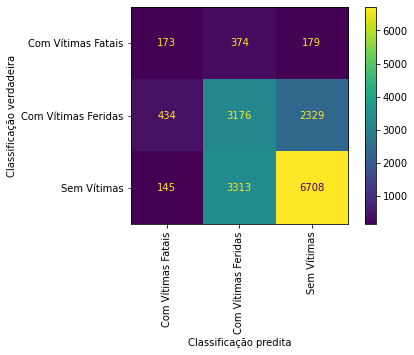

In [ ]:
plot_matriz_confusao(nn_model, X_test, y_test_binarizer, "binarizer")

## XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(eta=0.2, sampling_method='gradient_based', max_depth=4, n_estimators=100)
xgb_model.fit(X_train, y_train_label)

XGBClassifier(eta=0.2, max_depth=4, objective='multi:softprob',
              sampling_method='gradient_based')

Acurácia:  70.6969282870893 %
f1-score:  45.94397457207314 %


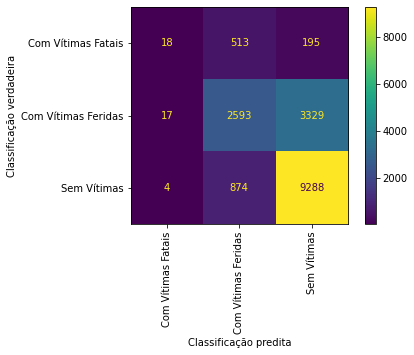

In [ ]:
plot_matriz_confusao(xgb_model, X_test, y_test_label, 'label')

Acurácia:  68.43918959063633 %
f1-score:  66.87384031935514 %


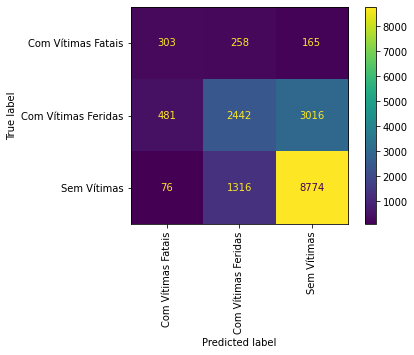

In [ ]:
plot_matriz_confusao(xgb_model, X_test, y_test_label, 'label')

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=5, class_weight="balanced")
clf = clf.fit(X_train, y_train_label)

Acurácia:  62.117521240567996 %
f1-score:  51.07001559036096 %


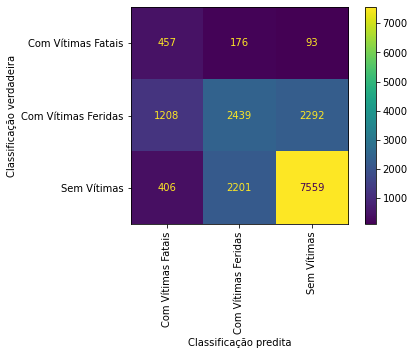

In [ ]:
plot_matriz_confusao(clf, X_test, y_test_label, 'label')

# Imblearn

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier,BalancedRandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier = BalancedRandomForestClassifier(
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(X_train, y_train_label)

BalancedRandomForestClassifier(random_state=42,
                               sampling_strategy='not majority')

Acurácia:  63.32362901788366 %
f1-score:  64.01242783391885 %


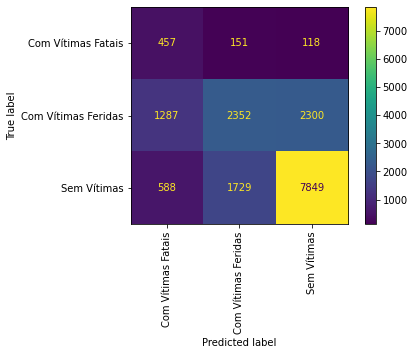

In [ ]:
plot_matriz_confusao(clf, X_test, y_test_label, 'label')

Light GBM

In [ ]:
import lightgbm as lgb
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
from sklearn.metrics import f1_score
lgbClassifier = lgb.LGBMClassifier(max_depth=7, learning_rate=0.05, num_leaves=90, n_estimators=150, random_state=42)
lgbClassifier.fit(X_train, y_train_label)

LGBMClassifier(learning_rate=0.05, max_depth=7, n_estimators=150, num_leaves=90,
               random_state=42)

In [ ]:
from sklearn.metrics import f1_score
from scipy.misc import derivative
def focal_loss_lgb(y_pred, dtrain, alpha, gamma, num_class):
    """
    Focal Loss for lightgbm

    Parameters:
    -----------
    y_pred: numpy.ndarray
        array with the predictions
    dtrain: lightgbm.Dataset
    alpha, gamma: float
        See original paper https://arxiv.org/pdf/1708.02002.pdf
    num_class: int
        number of classes
    """
    a,g = alpha, gamma
    y_true = dtrain.label
    # N observations x num_class arrays
    y_true = np.eye(num_class)[y_true.astype('int')]
    y_pred = y_pred.reshape(-1,num_class, order='F')
    # alpha and gamma multiplicative factors with BCEWithLogitsLoss
    def fl(x,t):
        p = 1/(1+np.exp(-x))
        return -( a*t + (1-a)*(1-t) ) * (( 1 - ( t*p + (1-t)*(1-p)) )**g) * ( t*np.log(p)+(1-t)*np.log(1-p) )
    partial_fl = lambda x: fl(x, y_true)
    grad = derivative(partial_fl, y_pred, n=1, dx=1e-6)
    hess = derivative(partial_fl, y_pred, n=2, dx=1e-6)
    # flatten in column-major (Fortran-style) order
    return grad.flatten('F'), hess.flatten('F')

def focal_loss_lgb_eval_error(y_pred, dtrain, alpha, gamma, num_class):
    """
    Focal Loss for lightgbm

    Parameters:
    -----------
    y_pred: numpy.ndarray
        array with the predictions
    dtrain: lightgbm.Dataset
    alpha, gamma: float
        See original paper https://arxiv.org/pdf/1708.02002.pdf
    num_class: int
        number of classes
    """
    a,g = alpha, gamma
    y_true = dtrain.label
    y_true = np.eye(num_class)[y_true.astype('int')]
    y_pred = y_pred.reshape(-1, num_class, order='F')
    p = 1/(1+np.exp(-y_pred))
    loss = -( a*y_true + (1-a)*(1-y_true) ) * (( 1 - ( y_true*p + (1-y_true)*(1-p)) )**g) * ( y_true*np.log(p)+(1-y_true)*np.log(1-p) )
    # a variant can be np.sum(loss)/num_class
    return 'focal_loss', np.mean(loss), False

In [ ]:
from sklearn.metrics import f1_score

def multi_class_f1_score_factory(num_classes, average):
    #if average != "macro" and average != "micro":
     #   raise ValueError("average should be 'macro' or 'micro'")

    eval_name = "f1_" + average

    def multi_class_f1_score(y_pred, data):
        y_true = data.get_label()
        y_pred = y_pred.reshape((num_classes, -1))
        y_pred = np.transpose(y_pred)
        y_pred = np.argmax(y_pred, axis=1)
        return eval_name, f1_score(y_true, y_pred, average=average), True

    return multi_class_f1_score

In [ ]:
params = {
    'boosting_type': 'gbdt',
    #'objective': focal_loss,
    #'metric': 'multi_logloss',
    'num_leaves': 81,
    'num_class':3,
    'learning_rate': 0.05,
    'verbose': 0,
    'max_depth': 7,
    'random_state': 42
}

In [ ]:
lgb_train = lgb.Dataset(X_train, y_train_label, free_raw_data=False)
lgb_eval = lgb.Dataset(X_test, y_test_label, reference=lgb_train, free_raw_data=False)

In [ ]:
focal_loss = lambda x,y: focal_loss_lgb(x, y, 0.1, 0.5,3)
eval_error = lambda x,y: focal_loss_lgb_eval_error(x, y, 0.1, 0.5,3)
bst = lgb.train(params, num_boost_round=120,
                train_set=lgb_train,
                 fobj=focal_loss,
                  feval=eval_error,
                #feval=multi_class_f1_score_factory(3, 'weighted'),
                valid_sets=lgb_eval)

[1]	valid_0's focal_loss: 0.29244
[2]	valid_0's focal_loss: 0.276101
[3]	valid_0's focal_loss: 0.261181
[4]	valid_0's focal_loss: 0.247543
[5]	valid_0's focal_loss: 0.235011
[6]	valid_0's focal_loss: 0.223512
[7]	valid_0's focal_loss: 0.2129
[8]	valid_0's focal_loss: 0.203113
[9]	valid_0's focal_loss: 0.194064
[10]	valid_0's focal_loss: 0.185682
[11]	valid_0's focal_loss: 0.177928
[12]	valid_0's focal_loss: 0.170714
[13]	valid_0's focal_loss: 0.164026
[14]	valid_0's focal_loss: 0.157814
[15]	valid_0's focal_loss: 0.152015
[16]	valid_0's focal_loss: 0.146629
[17]	valid_0's focal_loss: 0.141607
[18]	valid_0's focal_loss: 0.136915
[19]	valid_0's focal_loss: 0.132552
[20]	valid_0's focal_loss: 0.128463
[21]	valid_0's focal_loss: 0.124651
[22]	valid_0's focal_loss: 0.121079
[23]	valid_0's focal_loss: 0.117749
[24]	valid_0's focal_loss: 0.114643
[25]	valid_0's focal_loss: 0.111722
[26]	valid_0's focal_loss: 0.108997
[27]	valid_0's focal_loss: 0.106444
[28]	valid_0's focal_loss: 0.104049
[29]

In [ ]:
plot_matriz_confusao(bst, X_test, y_test_binarizer, 'binarizer')

NameError: ignored

In [ ]:
lgbClassifier = lgb.LGBMClassifier(max_depth=7, learning_rate=0.05, num_leaves=90, n_estimators=150,
                                 random_state=42, max_bin=256, importance_type='gain')
lgbClassifier.fit(X_train, y_train_label, feval=lgb_f1_score)

TypeError: ignored

Acurácia:  71.00588200344602 %
f1-score:  50.72023055040186 %


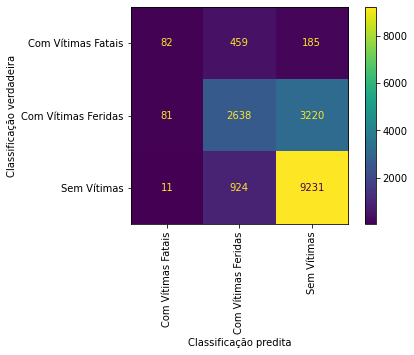

In [ ]:
plot_matriz_confusao(lgbClassifier, X_test, y_test_label, 'label')